In [30]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import logging
from matplotlib.colors import ListedColormap
import seaborn as sns
from Classification.KNNAlg import KNN

In [31]:
# dataset=load_iris(return_X_y=True)
# features=dataset[0][:,0:2]
# labels=dataset[1]
dataset=load_iris()
features=dataset.data[:,0:2]
labels=dataset.target

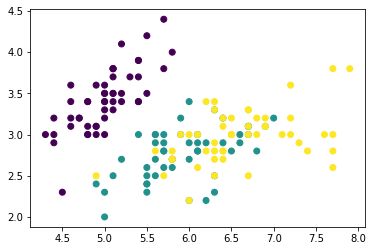

In [32]:
plt.scatter(features[:,0],features[:,1],c=labels)

In [23]:
x=np.linspace(min(features[:,0]),max(features[:,0]),50)
y=np.linspace(min(features[:,1]),max(features[:,1]),50)
X,Y=np.meshgrid(x,y)
points=np.dstack([X.flatten(),Y.flatten()]).squeeze()

In [34]:
predictLabel=[]
k=3
for point in points:
    predictLabel.append(KNN(point.reshape(1,2),features,labels,k))
    # pass

(50, 50)
(50, 50)
(2500,)


Text(0.5, 1.0, '3-Classes K-nearest neightbor classifing k=3')

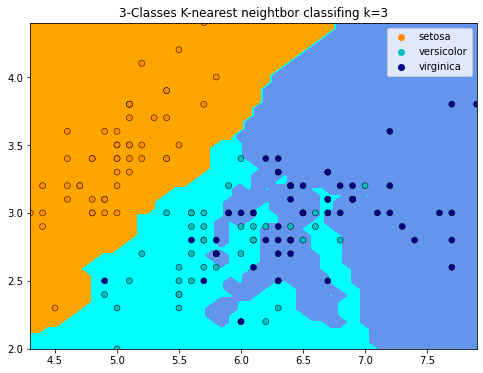

In [35]:
predictLabel=np.array(predictLabel)
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]
# plt.scatter(points[:,0],points[:,1],c=predictLabel)
# Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
print(X.shape)
print(Y.shape)
print(predictLabel.shape)
plt.contourf(X, Y, predictLabel.reshape(X.shape), cmap=cmap_light)
sns.scatterplot(
    x=features[:, 0],
    y=features[:, 1],
    hue=dataset.target_names[labels],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.title("3-Classes K-nearest neightbor classifing k="+str(k))
# plt.scatter(features[:,0],features[:,1],c=labels,cmap=cmap_bold)
# plt.contourf(X, Y, predictLabel.reshape(X.shape))

In [11]:
i=0
dist=np.linalg.norm(features-points[i],axis=1)
dist.shape
k=5
votes=labels[np.argsort(dist)[:k]]
np.bincount(votes)
votes
test=[0,0,1,2,5,8,8]
np.bincount(test)

array([2, 1, 1, 0, 0, 1, 0, 0, 2], dtype=int64)

## Comparing with sklearn

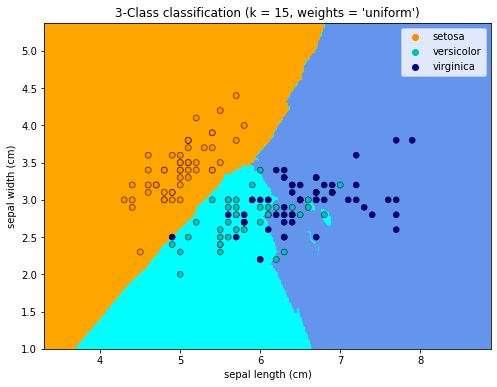

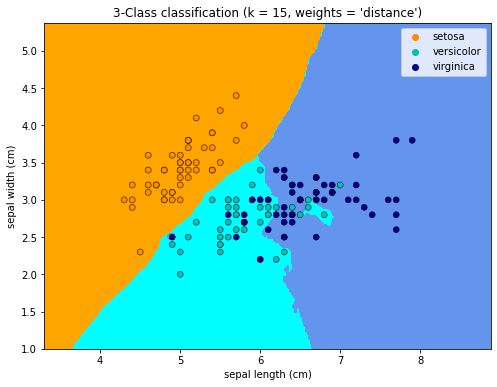

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

In [23]:
iris.data.shape

(150, 4)